# Análisis de los Factores de Riesgo del Cáncer Cervical

Librerías

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [2]:
cervical_cancer_risk_factors = fetch_ucirepo(id=383)
df: pd.DataFrame = cervical_cancer_risk_factors.data.features

## Análisis Exploratorio de Datos

In [3]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
# profile = ProfileReport(df, title="Cervical Cancer Risk Factors Report")
# profile.to_notebook_iframe()
# profile.to_file("report/report.html")

### 1. Conclusiones del EDA
Con el análisis exploratorio, podemos concluir que:
1. **Hay 36 variables:** 10 son numéricas y 26 son categóricas
2. **Hay pocas celdas con valores faltantes:** Los valores faltantes se presentan en *features* categóricos de verdadero/falso. Pueden ser imputados con la moda.
3. **Hay columnas con un valor constate:** Particularmente ``STDs:cervical condylomatosis`` y ``STDs:AIDS`` tienen valores de 0 en todas las observaciones, por lo que pueden ser eliminadas.
4. **Alta correlación:** Existen *features* que tienen alta correlación
5. **Desbalance de datos:** Los *features* tienen mucho desbalance de clases.
6. **Datos atípicos:** La cantidad de datos atípicos es muy baja, por lo que podemos eliminar esas observaciones.

### 2. Descripción de variables
- **Age** (Edad de la paciente): Cuantitativa (continua)
- **Number.of.sexual.partners** (Cantidad de parejas sexuales): Cuantitativa (discreta)
- **First.sexual.intercourse** (Edad del primer encuentro sexual): Cuantitativa (discreta)
- **Num.of.pregnancies** (Cantidad de embarazos): Cuantitativa (discreta)
- **Smokes** (Si fuma o no): Categórica (Nominal)
- **Smokes.years** (Años que lleva fumando): Cuantitativa (continua)
- **Smokes.packs.per.year** (Cajetillas de cigarrillos por año): Cuantitativa (continua)
- **Hormonal.Contraceptives** (Si usa anticonceptivos hormonales o no): Categórica (Nominal)
- **Hormonal.Contraceptives.years** (Años usando anticonceptivos hormonales): Cuantitativa (continua)
- **IUD** (Si tiene colocado algún dispositivo intrauterino): Categórica (Nominal)
- **IUD.years** (Años usando un DIU): Cuantitativa (continua)
- **STDs** (Si ha tenido enfermedades de transmisión sexual): Categórica (Nominal)
- **STDs.number** (Cuantas ETS ha tenido): Cuantitativa (discreta)
- **STDs.condylomatosis** (Si ha tenido condilomatosis): Categórica (Nominal)
- **STDs.cervical.condylomatosis** (Si ha tenido condilomatosis cervical): Categórica (Nominal)
- **STDs.vaginal.condylomatosis** (Si ha tenido condilomatosis vaginal): Categórica (Nominal)
- **STDs.vulvo.perineal.condylomatosis** (Si ha tenido condilomatosis vulvo perineal): Categórica (Nominal)
- **STDs.syphilis** (Si ha tenido Sífilis): Categórica (Nominal)
- **STDs.pelvic.inflammatory.disease** (Si ha tenido inflamaciones pélvicas): Categórica (Nominal)
- **STDs.genital.herpes** (Si ha tenido herpes genital): Categórica (Nominal)
- **STDs.molluscum.contagiosum** (Si ha tenido molusco contagioso): Categórica (Nominal)
- **STDs.AIDS** (Si tiene SIDA): Categórica (Nominal)
- **STDs.HIV** (Si tiene VIH): Categórica (Nominal)
- **STDs.Hepatitis.B** (Si ha tenido o tiene hepatitis B): Categórica (Nominal)
- **STDs.HPV** (Si ha tenido o tiene Virus del Papiloma Humano): Categórica (Nominal)
- **STDs.Number.of.diagnosis** (Cantidad de diagnósticos de ETS): Cuantitativa (discreta)
- **STDs.Time.since.first.diagnosis** (Tiempo desde el primer diagnóstico): Cuantitativa (continua)
- **STDs.Time.since.last.diagnosis** (Tiempo desde el último diagnóstico): Cuantitativa (continua)
- **Dx.Cancer (Si tiene diagnóstico** de cáncer o no): Categórica (Nominal)
- **Dx.CIN** (Si tiene diagnóstico de NIC): Categórica (Nominal)
- **Dx.HPV** (Si tiene diagnóstico de Virus del Papiloma Humano): Categórica (Nominal)
- **Dx** (Si tiene algún diagnóstico): Categórica (Nominal)
- **Hinselmann** (Si hicieron Colposcopía): Categórica (Nominal)
- **Schiller** (Si hicieron la prueba de Schiller): Categórica (Nominal)
- **Citology** (Si hicieron citología): Categórica (Nominal)
- **Biopsy** (Si hicieron Biopsia): Categórica (Nominal)

### 3. Gráficos Exploratorios
Para este paso ha sido útil la utiliación de ``ydata_profiling``. Para poder ver los gráficos exploratorios abra en un navegador el [archivo HTML](report/report.html). Luego, en el menú de navegación visite la opción llamada ``Variables``

### 4. Análisis de variables

#### 4.1 Aislamiento de variables

In [5]:
categorical_columns = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis',
    'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
    'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
    'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
    'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
    'Hinselmann', 'Schiller', 'Citology', 'Biopsy'
]

for column in categorical_columns:
    df[column] = df[column].astype('bool')
    
nominal_columns = df.select_dtypes(include=[bool]).columns
nominal_columns

Index(['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN',
       'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')

In [6]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              858 non-null    bool   
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             858 non-null    bool   
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 858 non-null    bool   
 10  IUD (years)                         741 non-null    float64
 11  STDs                                858 non-n

In [8]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,False,0.0,0.0,False,0.0,False,...,NaN,NaN,False,False,False,False,False,False,False,False
1,15,1.0,14.0,1.0,False,0.0,0.0,False,0.0,False,...,NaN,NaN,False,False,False,False,False,False,False,False
2,34,1.0,NaN,1.0,False,0.0,0.0,False,0.0,False,...,NaN,NaN,False,False,False,False,False,False,False,False
3,52,5.0,16.0,4.0,True,37.0,37.0,True,3.0,False,...,NaN,NaN,True,False,True,False,False,False,False,False
4,46,3.0,21.0,4.0,False,0.0,0.0,True,15.0,False,...,NaN,NaN,False,False,False,False,False,False,False,False


#### 4.2 Análisis de Correlación
Para este paso ha sido útil la utiliación de ``ydata_profiling``. Para poder ver los gráficos exploratorios abra en un navegador el [archivo HTML](report/report.html). Luego, en el menú de navegación visite la opción llamada ``Correlations``.

### 5. Análisis de Variables Categóricas

#### 5.1 Diagramas de Pie

In [9]:
%matplotlib inline

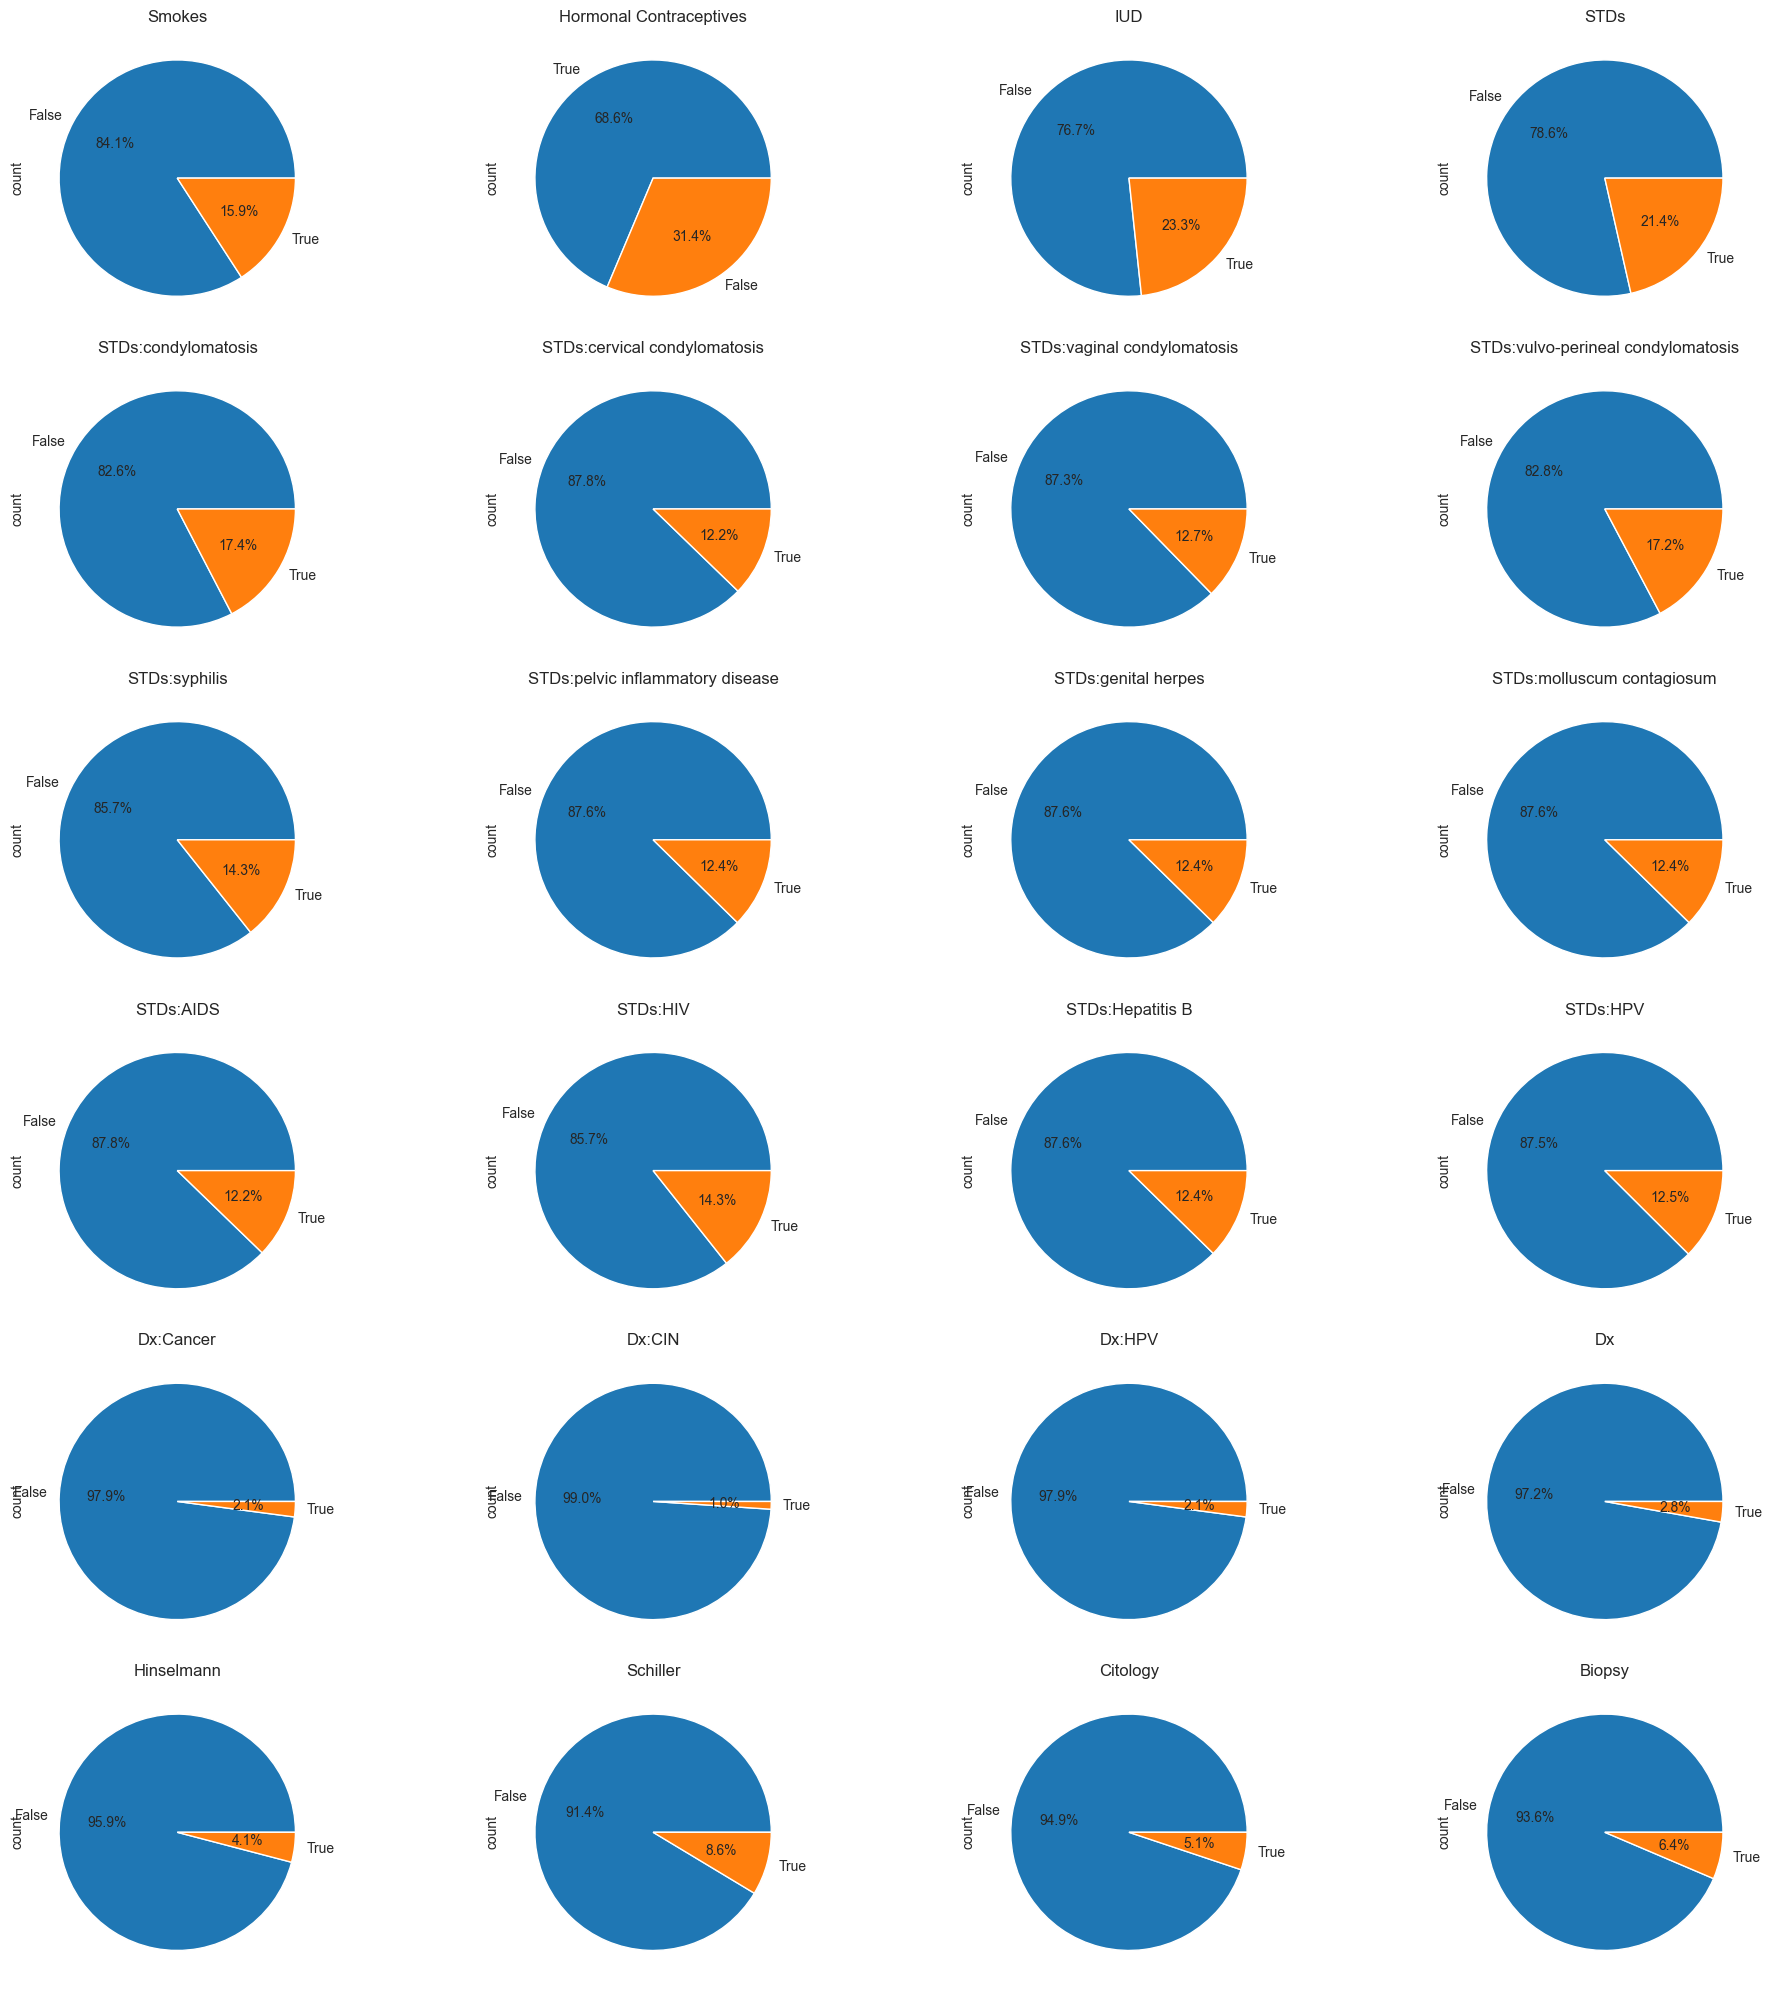

In [10]:
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
axes = axes.flatten()
for i, column in enumerate(nominal_columns):
    df[column].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i], title=column)
plt.tight_layout()
plt.show()

### 6. Comportamiento de valores faltantes

In [11]:
from sklearn.impute import SimpleImputer

``Number of sexual partners``, ``Num of Pregnancies``, ``Smokes``, ``Smokes (years)``, ``Smokes (packs/year)`` les hacen falta valores, pero la cantidad no es significante, por lo que se eliminarán las observaciones con valores faltantes.

In [12]:
to_drop = ['Number of sexual partners', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)']

df.dropna(subset=to_drop, inplace=True)

``STDs: Time since first diagnosis`` y ``STDs: Time since last diagnosis`` tienen, prácticamente todos los valores faltantes (91.7%), por lo que este *feature* se eliminará

In [13]:
df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)

El resto de variables tienen alrededor de 100 valores faltantes, por lo que se imputarán con la moda. Esto provocará que las variables categóricas tengan valores faltantes imputados con ``False`` y, donde se tiene *(years)* se imputará con 0. 

In [14]:
imp = SimpleImputer(strategy='most_frequent')

df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

In [15]:
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


### 7. PCA en variables categóricas
El proceso de realización de PCA es posible realizarse con PCA (después de haber transformado las variables categóricas a numéricas). Sin embargo, no es recomendable, pues a este tipo de variables les hace falta la estructura numérica para poder realizar el análisis. Para este tipo de situaciones, es recomendable utilizar el Análisis de Correspondencia Múltiple (MCA).

Fuentes: [Villasante, P. & Kebabci, C. (2023)](https://statisticsglobe.com/pca-categorical-variables)